# Breast Cancer Classifier -- Final Project

In this project, we will be predicting whether a breast cancer is benign or malignant through different Machine Learning Classification Models.

First of all, attach the breast cancer dataset in this project directory.

## Data Description

You can obtain the dataset from this link:<br>
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

- ID number
- Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

## Data Loading

This is where we will load the dataset, and conduct data exploration and analysis

We will need pandas library to do this

In [1]:
import pandas as pd

*We can use this method below if we have a lot of columns, and want to display all of it.*

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("cancer.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

If you observe, the 33rd column is empty, so we need to drop it.

In [6]:
df.drop("Unnamed: 32", axis=1, inplace=True)

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


__Describing Data__

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

__Exploring Data Label__

In [12]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [13]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

__Checking Null and Duplicate Values__

In [14]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [15]:
df.duplicated().any()

False

## Data Visualization

Let's now visualize our dataset to better interpret it.

We need to import these libraries first.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import klib

We can set the desired graph styles for matplotlib and seaborn.

In [17]:
plt.style.use('seaborn')

In [18]:
sns.set(rc={"figure.facecolor" : "white"})

### Bar Graph

Firstly, we need to check whether our dataset is balanced or not. We can do this using countplot.

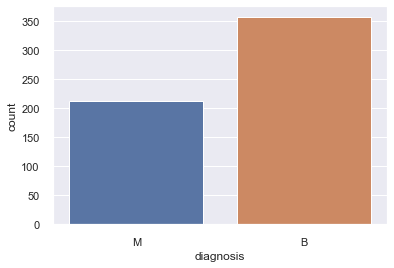

In [19]:
sns.countplot(x=df["diagnosis"])
plt.show()

We can deduce that our dataset is indeed quite imbalanced. There are more benign cases than Malignant cases in the dataset.

### Multi-Histogram

Next, we can analyze the distribution of every numerical feature/column in our dataset. We can do this using histogram.

First of all, we need to drop the **"id" and "diagnosis"** columns, because we cannot find distribution for id, every person has a unique id. In addition, diagnosis contains categorical data.

In [20]:
distribution = df.drop(["id", "diagnosis"], axis=1)

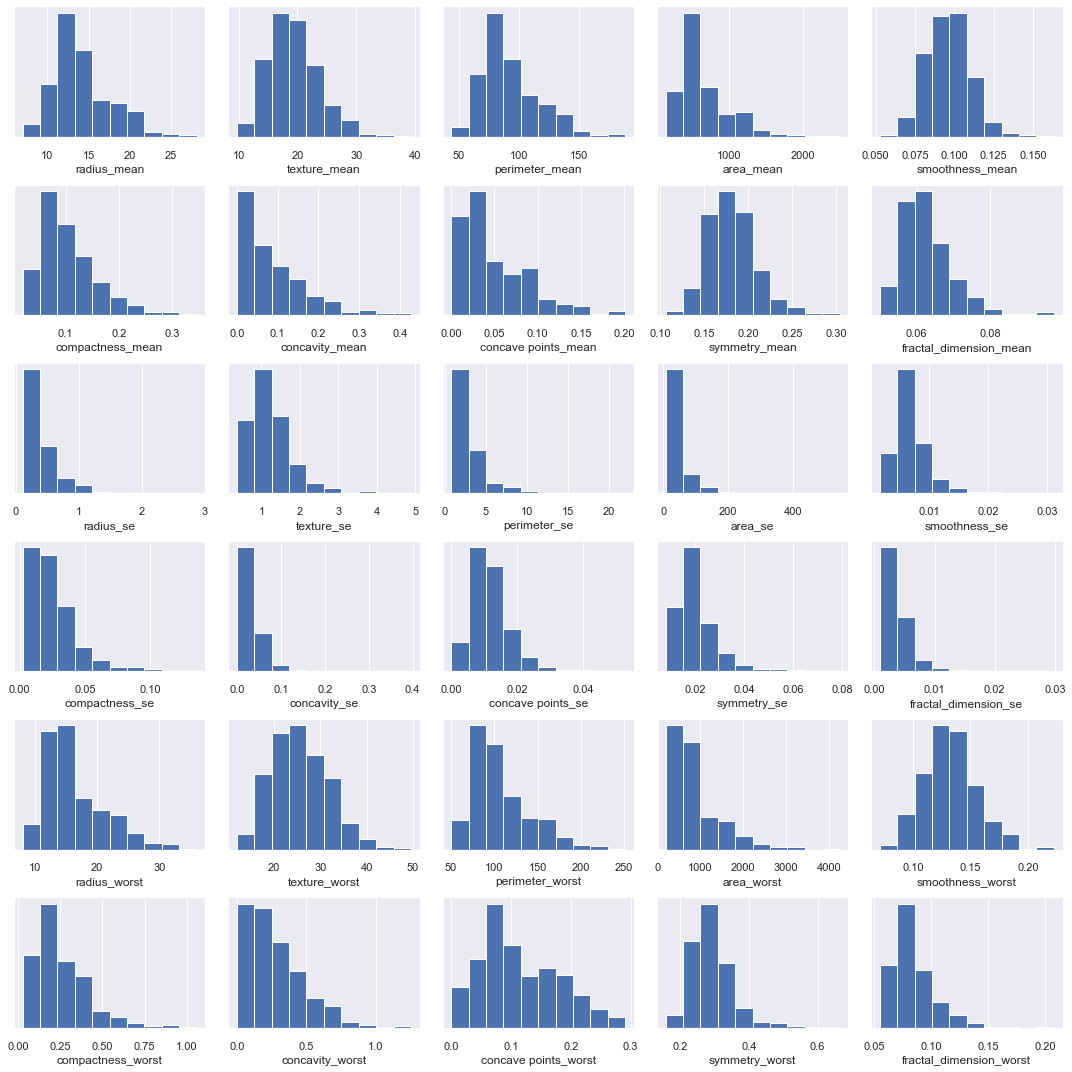

In [21]:
plt.figure(figsize=(15, 15))

for count, column in enumerate(distribution.columns):
    plt.subplot(6, 5, count+1)
    plt.hist(distribution[column])
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    plt.xlabel(column)
    plt.tight_layout()

plt.show()

Through this multi-histogram visualization, we can analyze the distribution of every column in the dataset, such as the range, maximum and minimum value, and also the trend of the data.

### Box Plot

After that, we can use a box plot to analyze the range and distribution of every column in our dataset based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are.

Below is the visualization of boxplot for every feature.

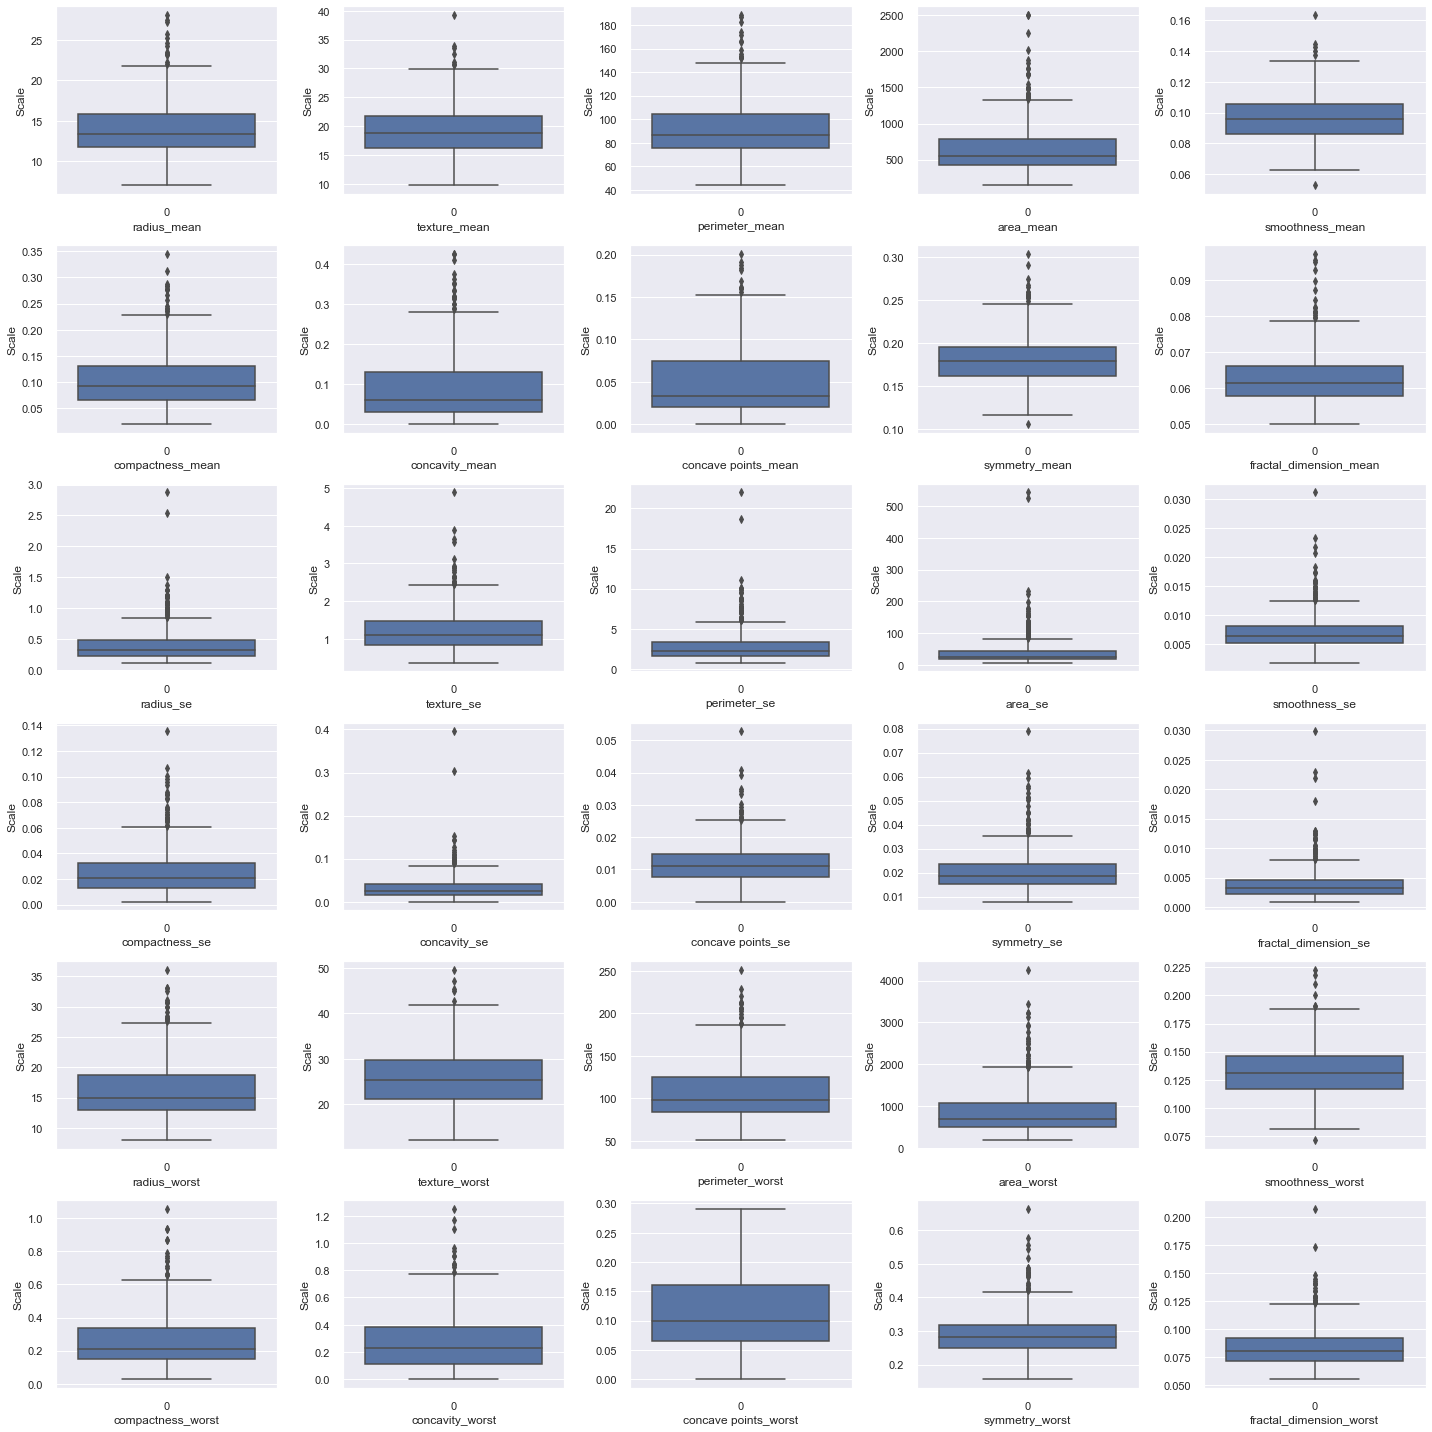

In [22]:
plt.figure(figsize=(20, 20))

for count, column in enumerate(distribution.columns):
    plt.subplot(6, 5, count+1)
    sns.boxplot(data=distribution[column])
    plt.xlabel(column)
    plt.ylabel("Scale")
    plt.tight_layout()

plt.show()

### Heat Map

We will use a heatmap to visualize the features that has the highest correlation with the target variable(DIAGNOSIS)

Before we go any further, remember that **diagnosis** data type is object. And if you try to use **"df.corrwith(df["diagnosis"])"** immediately, you will encounter an error, like this:<br>
<font color=red>TypeError: unsupported operand type(s) for /: 'str' and 'int'</font><br>
Hence, we need to use **"Label Encoder()"** from **sklearn** to convert categorical data, or text data, into numbers, in order for **"df.corrwith()"** to work. In addition, this is part of pre-processing, for our predictive models to better understand the label.

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le_process = LabelEncoder()
df["diagnosis_le"] = le_process.fit_transform(df["diagnosis"])

You can see **"diagnosis_le"** created on the very last column.

In [25]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_le
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Now let us compare these two columns:
- They both have equal value counts.
- They both have two categorical values.
- B represents 0 (Benign)
- M represents 1 (Malignant)

In [26]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [27]:
df["diagnosis_le"].value_counts()

0    357
1    212
Name: diagnosis_le, dtype: int64

The following code aims to:
1. Find every column's correlation with the target variable that has been encoded.
2. Give the columns a name.
3. Drop irrelevant rows, which are ID and the target variable itself.
4. Sort Values in descending order, since the features with negative correlation have very low values.
5. Reset Index, and drop the extra column created.

In [28]:
corr = df.corrwith(df["diagnosis_le"]).reset_index()
corr.columns = ["Feature", "Corr Value"]
corr.drop([0, 31], inplace=True)
corr.sort_values(by="Corr Value", ascending=False, inplace=True)
corr.reset_index(inplace=True)
corr.drop("index", axis=1, inplace=True)

In [29]:
corr

,Feature,Corr Value
0,concave points_worst,0.793566
1,perimeter_worst,0.782914
2,concave points_mean,0.776614
3,radius_worst,0.776454
4,perimeter_mean,0.742636
5,area_worst,0.733825
6,radius_mean,0.730029
7,area_mean,0.708984
8,concavity_mean,0.696360
9,concavity_worst,0.659610


According to https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf ,
The relationship between two variables is generally considered strong when their r value is larger than 0.7. The correlation r measures the strength of the linear relationship between two quantitative variables.

As a result, we want to select Features that have a correlation value greater than 0.7 only.

In [30]:
best_features = corr.loc[corr['Corr Value'] > 0.7]

In [31]:
best_features

,Feature,Corr Value
0,concave points_worst,0.793566
1,perimeter_worst,0.782914
2,concave points_mean,0.776614
3,radius_worst,0.776454
4,perimeter_mean,0.742636
5,area_worst,0.733825
6,radius_mean,0.730029
7,area_mean,0.708984


In order to visualize this in a heatmap, we need to set the index of the dataframe as the features. We can then rename the columns for better understanding.

In [32]:
best_features.set_index("Feature", inplace=True)
best_features.columns = ["Diagnosis (M OR B)"]

In [33]:
best_features

,Diagnosis (M OR B)
Feature,
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984


**Visualize in a HeatMap**

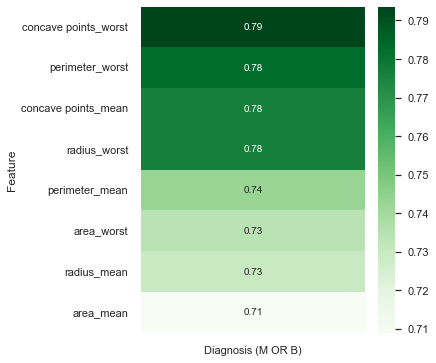

In [34]:
plt.figure(figsize=(5, 6))
sns.heatmap(data=best_features, cmap="Greens", annot=True)
plt.show()

We can see a total of 8 features having a correlation greater than 0.7, with the greatest being almost 0.8. This is very good for data modeling later on.

### Multi Scatter Plot

We can try to see the relationship/correlation for every top feature with the target (Diagnosis) variable.

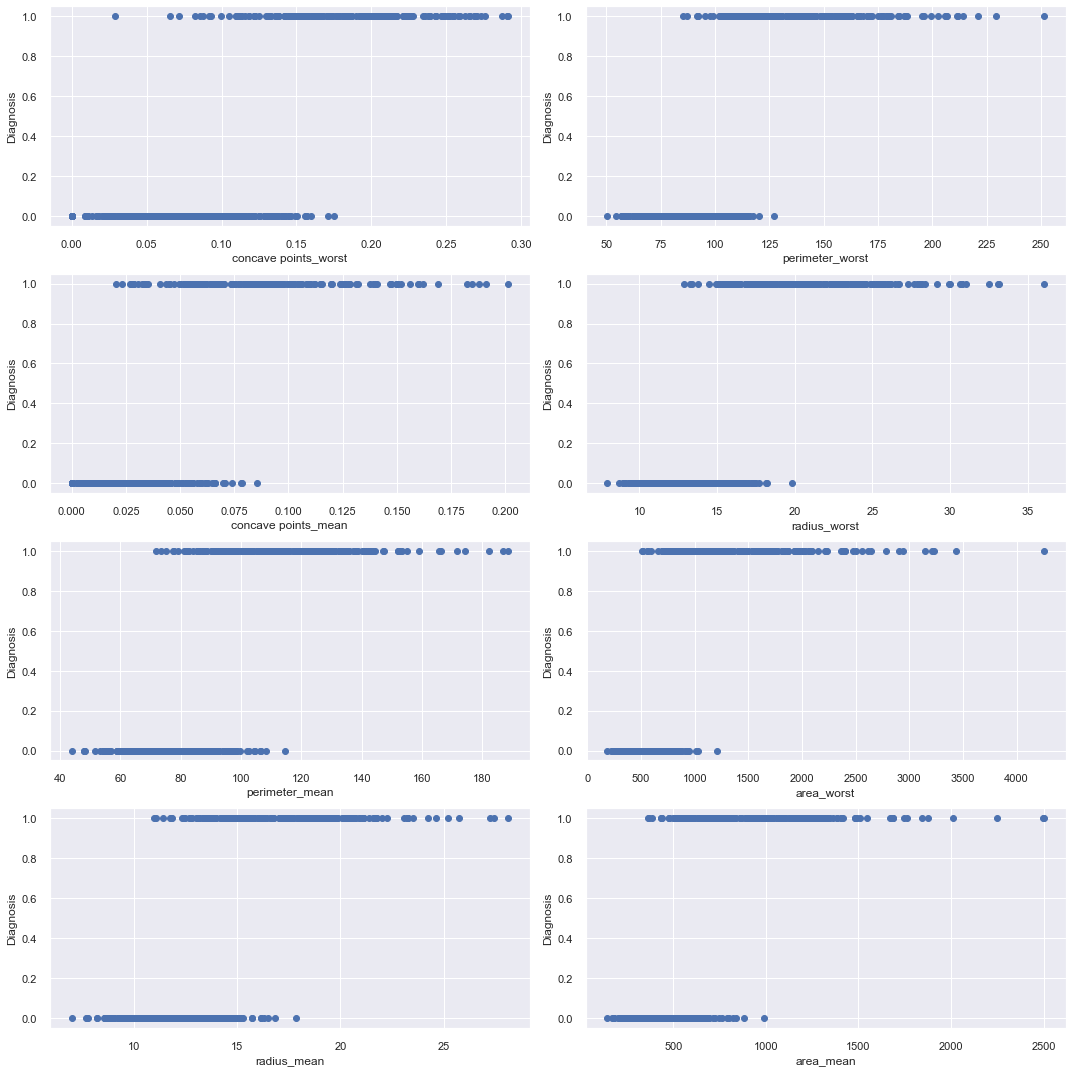

In [35]:
plt.figure(figsize=(15, 15))

for count, column in enumerate(best_features.index):
    plt.subplot(4, 2, count+1)
    plt.scatter(x=df[column], y=df["diagnosis_le"])
    plt.xlabel(column)
    plt.ylabel("Diagnosis")
    plt.tight_layout()

plt.show()

From the Multi Scatter Plot above, we can see that the values of every feature tend to be higher if the cancer is malignant(symbolized by 1). 

## Data PreProcessing

This is where we will conduct:
1. Preparing our Features and Labels
2. Splitting them into Training and Test Set.
3. Feature Scaling

__Preparing our Features and Labels__

In [36]:
x = df[best_features.index]
y = df["diagnosis_le"]

In [37]:
x.head()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean
0,0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0
1,0.1860,158.80,0.07017,24.99,132.90,1956.0,20.57,1326.0
2,0.2430,152.50,0.12790,23.57,130.00,1709.0,19.69,1203.0
3,0.2575,98.87,0.10520,14.91,77.58,567.7,11.42,386.1
4,0.1625,152.20,0.10430,22.54,135.10,1575.0,20.29,1297.0


In [38]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis_le, dtype: int32

**Splitting them into Training and Test Set.**

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 8)
(114, 8)
(455,)
(114,)


**Feature Scaling**

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Data Modeling

Before we proceed into training our data, we first need to select a suitable Machine Learning model, for predicting the best results.

In our dataset we have the target variable (Diagnosis) having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm of supervised learning.

We have different types of classification algorithms in Machine Learning such as:

1. Logistic Regression
2. K-Nearest Neighbor
3. Support Vector Machines
4. Naïve Bayes
5. Decision Tree Algorithm
6. Random Forest Classification

In this project, I will be using Decision Tree Algorithm and Random Forest Classification.

The reason why I choose these 2 models, is because they are interrelated. Decision Tree is the basis or foundation of Random Forest Algorithm.

Let's start by importing the libaries required for data modeling.

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

__Decision Tree Algorithm__

The goal of using a Decision Tree is to create a model that can be used to predict the class of the target variable by learning simple decision rules inferred from training data.

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

In [45]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

__Random Forest Classification__

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [46]:
rf_model = RandomForestClassifier(n_estimators = 110, criterion = 'entropy', random_state = 0)
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=110, random_state=0)

## Data Evaluation

### Model Evaluation Metrics

We will now predict the test set results and check the accuracy with each of our model:

We can do this through two methods:
- Confusion Matrix
- Classification Report

A confusion matrix is a way of tabulating the number of mis-classifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes. We can obtain the *True Positive, True Negative, False Positive, and False Negative* through a confusion matrix.

A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.

Firstly, import the two required methods from sklearn library.

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

#### Decision Tree Algorithm

**Predicting Train and Test Set**

In [48]:
dt_ytrain_pred = dt_model.predict(x_train)
dt_ytest_pred = dt_model.predict(x_test)

__Confusion Matrix__

In [49]:
dt_cm = confusion_matrix(y_test, dt_ytest_pred)

In [50]:
dt_cm

array([[62,  5],
       [ 6, 41]], dtype=int64)

To present this confusion matrix in a heatmap, we can use the following code:

In [51]:
import numpy as np

In [52]:
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in dt_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in dt_cm.flatten()/np.sum(dt_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

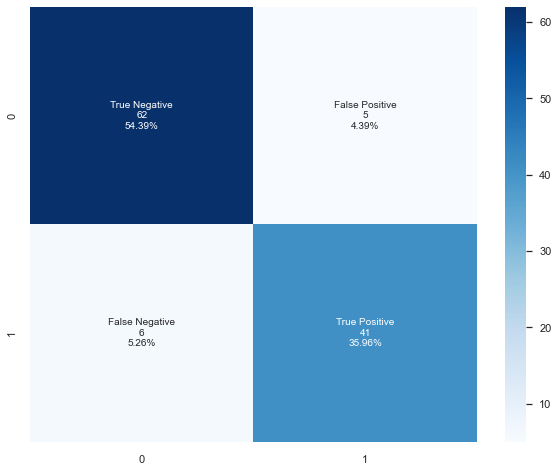

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(dt_cm, annot=labels, fmt='', cmap='Blues')
plt.show()

You can see here that there are a total of 11 misclassifications, that are evenly distributed at False Positive and False Negative.

__Classification Report__

*Training Set*

In [54]:
print('DECISION TREE TRAINING RESULT:')
print('======================================================')
print('Accuracy:', dt_model.score(x_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, dt_ytrain_pred))
print('======================================================')

DECISION TREE TRAINING RESULT:
Accuracy: 1.0
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       165

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



*Test Set*

In [55]:
print('DECISION TREE TEST RESULT:')
print('======================================================')
print('Accuracy:', dt_model.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, dt_ytest_pred))
print('======================================================')

DECISION TREE TEST RESULT:
Accuracy: 0.9035087719298246
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        67
           1       0.89      0.87      0.88        47

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



#### Random Forest Classification

**Predicting Train and Test Set**

In [56]:
rf_ytrain_pred = rf_model.predict(x_train)
rf_ytest_pred = rf_model.predict(x_test)

__Confusion Matrix__

In [57]:
rf_cm = confusion_matrix(y_test, rf_ytest_pred)

In [58]:
rf_cm

array([[65,  2],
       [ 2, 45]], dtype=int64)

To present this confusion matrix in a heatmap, we can use the following code:

In [59]:
import numpy as np

In [60]:
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in rf_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in rf_cm.flatten()/np.sum(rf_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

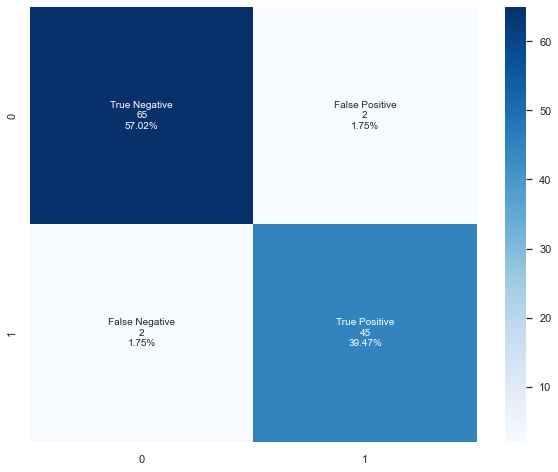

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(rf_cm, annot=labels, fmt='', cmap='Blues')
plt.show()

You can see here that there are a total of 4 misclassifications, that are evenly distributed at False Positive and False Negative.

__Classification Report__

*Training Set*

In [62]:
print('RANDOM FOREST TRAINING RESULT:')
print('======================================================')
print('Accuracy:', rf_model.score(x_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, rf_ytrain_pred))
print('======================================================')

RANDOM FOREST TRAINING RESULT:
Accuracy: 1.0
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       165

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



*Test Set*

In [63]:
print('RANDOM FOREST TEST RESULT:')
print('======================================================')
print('Accuracy:', rf_model.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, rf_ytest_pred))
print('======================================================')

RANDOM FOREST TEST RESULT:
Accuracy: 0.9649122807017544
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### Feature Selection

So far, we have selected 8 features out of the 30 features in the dataset, which is awesome. We can try to bring the number of features further down if possible, but make sure it still retains the high accuracy.

We can use the **feature_importances_** attribute from both models, to see which particular features matter the most to the prediction of that model.

#### Decision Tree

In [64]:
feature_importances = pd.Series(data=dt_model.feature_importances_, index=x.columns)
feature_importances.sort_values(inplace=True)

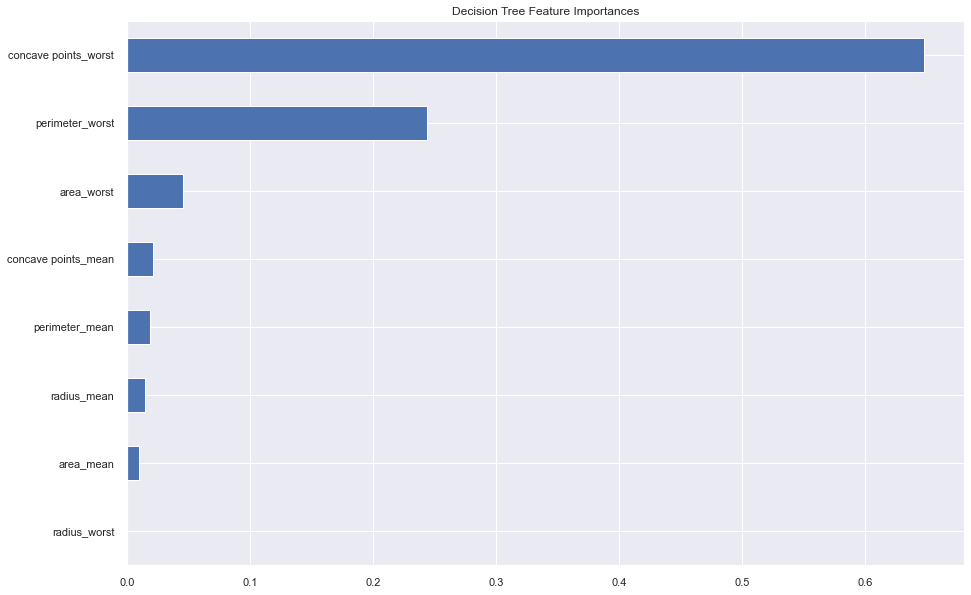

In [65]:
plt.figure(figsize=(15, 10))
feature_importances.plot(kind="barh")
plt.title('Decision Tree Feature Importances')
plt.show()

From the graph, we can observe that "radius_worst" doesn't contribute to the prediction of the decision tree model, so we can try to drop this feature, and retrain the model with the remaining features, and see whether the accuracy will increase.

__RETRAINING__

In [66]:
x_new = x.drop(["radius_worst"], axis=1)
y = df["diagnosis_le"]

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_model.fit(x_train, y_train)

dt_ytest_pred = dt_model.predict(x_test)

print('DECISION TREE TEST RESULT:')
print('======================================================')
print('Accuracy:', dt_model.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, dt_ytest_pred))
print('======================================================')

DECISION TREE TEST RESULT:
Accuracy: 0.9210526315789473
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.90      0.91      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



By dropping "radius_worst", which is an irrelevant feature, we can see an increase of 2 % accuracy which is great!

__Confusion Matrix__

In [67]:
dt_cm = confusion_matrix(y_test, dt_ytest_pred)

In [68]:
dt_cm

array([[62,  5],
       [ 4, 43]], dtype=int64)

To present this confusion matrix in a heatmap, we can use the following code:

In [69]:
import numpy as np

In [70]:
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in dt_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in dt_cm.flatten()/np.sum(dt_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

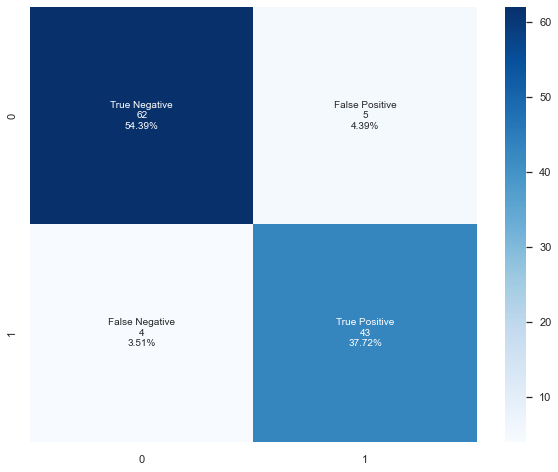

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(dt_cm, annot=labels, fmt='', cmap='Blues')
plt.show()

You can see here that there are a total of 9 misclassifications, that are evenly distributed at False Positive and False Negative.

#### Random Forest

In [72]:
feature_importances = pd.Series(data=rf_model.feature_importances_, index=x.columns)
feature_importances.sort_values(inplace=True)

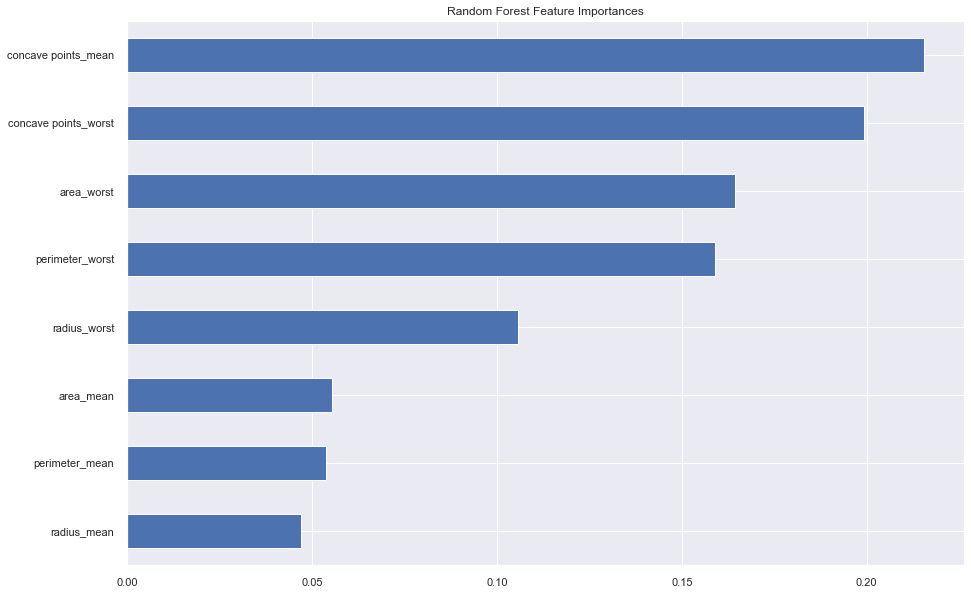

In [73]:
plt.figure(figsize=(15, 10))
feature_importances.plot(kind="barh")
plt.title('Random Forest Feature Importances')
plt.show()

From the graph, we can observe that "radius_mean", "perimeter_mean", "area_mean" contributes the least to the prediction of the model, so we can try to drop these 3 features, and retrain with the remaining features, and see whether there will be a change in accuracy. In fact, you can also experiment with other features such as "radius_worst" and "perimeter_worst"!

__RETRAINING__

In [74]:
x_new = x.drop(["radius_mean", "perimeter_mean", "area_mean", "radius_worst", "perimeter_worst"], axis=1)
y = df["diagnosis_le"]

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

rf_model = RandomForestClassifier(n_estimators = 110, criterion = 'entropy', random_state = 0)
rf_model.fit(x_train, y_train)

rf_ytest_pred = rf_model.predict(x_test)

print('RANDOM FOREST TEST RESULT:')
print('======================================================')
print('Accuracy:', rf_model.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, rf_ytest_pred))
print('======================================================')

RANDOM FOREST TEST RESULT:
Accuracy: 0.9824561403508771
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Surprisingly, by dropping 5 features till "perimeter_worst", the accuracy instead increased to 98 %!

__Confusion Matrix__

In [75]:
rf_cm = confusion_matrix(y_test, rf_ytest_pred)

In [76]:
rf_cm

array([[67,  0],
       [ 2, 45]], dtype=int64)

To present this confusion matrix in a heatmap, we can use the following code:

In [77]:
import numpy as np

In [78]:
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in rf_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in rf_cm.flatten()/np.sum(rf_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

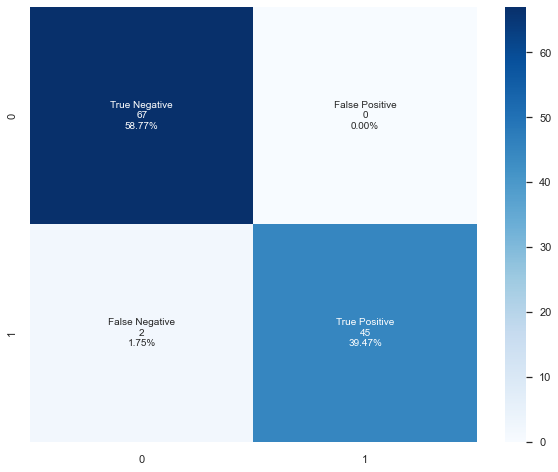

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(rf_cm, annot=labels, fmt='', cmap='Blues')
plt.show()

You can see here that there are a total of 2 misclassifications, that is on False Negative.

### Hyperparameter Tuning

In this section, we will conduct hyperparameter tuning using GridSearchCV. Our goal is to find the best set of hyperparameters that produces the highest accuracy among all. We will conduct hyperparameter tuning for both decision tree and random forest models. 

You can check out the hyperparameter options for both models from this link:
- Decision Tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


Firstly, import the method from sklearn library.

In [80]:
from sklearn.model_selection import GridSearchCV

And then experiment different set of parameters by editing the parameters dictionary.

#### Decision Tree

In [81]:
x_new = x.drop(["radius_worst"], axis=1)
y = df["diagnosis_le"]

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [82]:
dt_params = {
    "splitter" : ["best", "random"],
    "max_depth" : [None, 0,  1,  2,  3,  4,  5],
    "max_features" : ["auto", "sqrt", "log2", None],
    "max_leaf_nodes" : [None, 0,  1,  2,  3,  4,  5],
}

In [83]:
dt_gs = GridSearchCV(DecisionTreeClassifier(criterion="entropy", random_state = 0), dt_params)

In [84]:
dt_gs.fit(x_train, y_train)

d:\Computer Science Portfolio\AI and Machine Learning\Basic Supervised Learning\bsl\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Computer Science Portfolio\AI and Machine Learning\Basic Supervised Learning\bsl\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Computer Science Portfolio\AI and Machine Learning\Basic Supervised Learning\bsl\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Computer Science Portfolio\AI and Machine Learning\Basic Supervised Learning

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'max_depth': [None, 0, 1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': [None, 0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [85]:
print(dt_gs.best_params_)

{'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'splitter': 'best'}


In [86]:
acc = np.round(dt_gs.score(x_test, y_test)*100, decimals=2)
print(acc, "%")

92.98 %


In [87]:
acc = np.round(dt_model.score(x_test, y_test)*100, decimals=2)
print(acc, "%")

92.11 %


__Classification Report__

In [88]:
dtgs_ytest_pred = dt_gs.predict(x_test)

print('DECISION TREE GRID SEARCH CV TEST RESULT:')
print('======================================================')
print('Accuracy:', dt_gs.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, dtgs_ytest_pred))
print('======================================================')

DECISION TREE GRID SEARCH CV TEST RESULT:
Accuracy: 0.9298245614035088
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



You can observe that the accuracy, along with precision, recall, f1-score all increase slightly by around 1%.

__Confusion Matrix__

In [89]:
dtgs_cm = confusion_matrix(y_test, dtgs_ytest_pred)

In [90]:
dtgs_cm

array([[66,  1],
       [ 7, 40]], dtype=int64)

To present this confusion matrix in a heatmap, we can use the following code:

In [91]:
import numpy as np

In [92]:
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in dtgs_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in dtgs_cm.flatten()/np.sum(dtgs_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

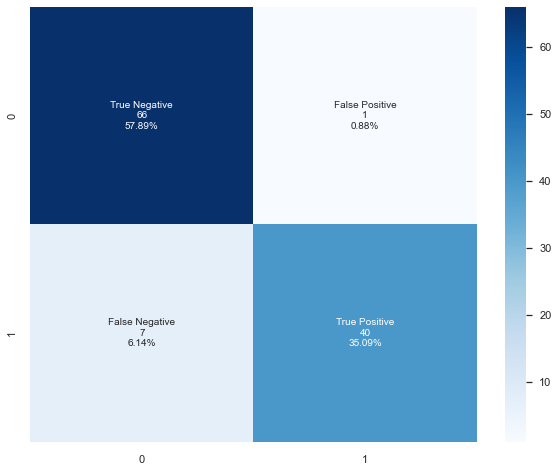

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(dtgs_cm, annot=labels, fmt='', cmap='Blues')
plt.show()

You can see there are a total of 8 misclassifications, however the values at false positive and false negative are quite imbalanced. So perhaps this is not really a good idea..

#### Random Forest

In [94]:
x_new = x.drop(["radius_mean", "perimeter_mean", "area_mean", "radius_worst", "perimeter_worst"], axis=1)
y = df["diagnosis_le"]

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [95]:
rf_params = {
    "bootstrap" : [True, False],
    "verbose" : [0, 1, 2, 3, 4, 5],
}

In [96]:
rf_gs = GridSearchCV(RandomForestClassifier(criterion = 'entropy', 
                                            random_state = 0, n_estimators=110), rf_params)

In [97]:
rf_gs.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Paral

building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.0s finished


GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=110,
                                              random_state=0),
             param_grid={'bootstrap': [True, False],
                         'verbose': [0, 1, 2, 3, 4, 5]})

In [98]:
print(rf_gs.best_params_)

{'bootstrap': True, 'verbose': 0}


In [99]:
acc = np.round(rf_gs.score(x_test, y_test)*100, decimals=2)
print(acc, "%")

98.25 %


In [100]:
acc = np.round(rf_model.score(x_test, y_test)*100, decimals=2)
print(acc, "%")

98.25 %


Using the parameter options listed in the dictionary, there seems to be no change in accuracy before and after hyperparameter tuning, so we can assume that the original parameters is already the best choice, and it has reached its maximum accuracy.

## Conclusion

In conclusion, here are the steps that we took in order to accomplish this project:
1. **Data Loading**: Explore and Analyse Data. Drop Empty Column.
2. **Data Visualization**: Present Data using various graphs and charts such as:
    - Bar Graph
    - Multi-Histogram
    - Box Plot
    - Heat Map
    - Multi Scatter Plot
3. **Data Pre-Processing**: Prepare Data for Modeling
    - Label Encoder for target variable
    - Preparing Starting Features (Corr Value > 0.7; 8 Features) and Labels
    - Splitting into Training and Test Set (Test-Size: 0.2)
    - Standard Scaler for numerical features
4. **Data Modeling**: Training our Models.
    - Model Selection : Decision Tree Classifier and Random Forest Classifier
    - Model Fitting
5. **Data Evaluation**: Evaluate our Trained Model, through various Steps:
    1. *Model Evaluation Metrics:*
        - Confusion Matrix
        - Classification Report
    2. *Feature Selection:*
        - Decision Tree Classifier : ['concave points_worst', 'perimeter_worst', 'concave points_mean',
       'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean']
        - Random Forest Classifier : ['concave points_worst', 'concave points_mean', 'area_worst']
    3. *Hyperparameter Tuning:*
        - Decision Tree Classifier : 
        DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth= 4, max_features= None, max_leaf_nodes= None, splitter= 'best')
        - Random Forest Classifier : 
        RandomForestClassifier(criterion = 'entropy', random_state = 0, n_estimators=110, bootstrap= True, verbose= 0)

In this project we have trained our models for a total of 3 times. <br>
The following shows the model F1 Score in predicting the test set for every stage:
1. **Basic Starting Model:**
    - *Decision Tree Classifier :* 90 %
    - *Random Forest Classifier :* 96 %
2. **Model After Feature Selection through Feature Importances:**
    - *Decision Tree Classifier :* 92 %
    - *Random Forest Classifier :* 98 %
3. **Model After Hyperparameter Tuning:**
    - *Decision Tree Classifier :* 93 %
    - *Random Forest Classifier :* 98 %